In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [34]:
data=pd.read_csv('Mall_Customers.csv')

In [35]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploring Data

In [36]:
data.isnull().any() # No null values to fill 

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [37]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

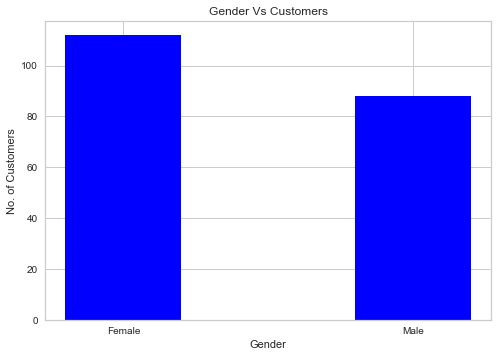

In [38]:
plt.bar(dict(data['Gender'].value_counts()).keys(),
        dict(data['Gender'].value_counts()).values(), color ='blue',
        width = 0.4)
 
plt.xlabel("Gender")
plt.ylabel("No. of Customers")
plt.title("Gender Vs Customers")
plt.show()

Male and Female has nearly 0.78 ratio which means equally contibuting to the mall

In [39]:
data['Age'].value_counts().head(5)

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

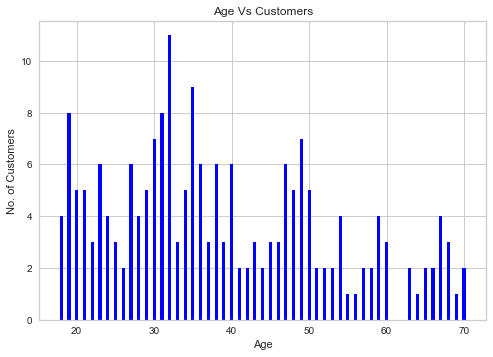

In [40]:
plt.bar(dict(data['Age'].value_counts()).keys(),
        dict(data['Age'].value_counts()).values(), color ='blue',
        width = 0.4)
 
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.title("Age Vs Customers")
plt.show()

In [41]:
data['Annual Income (k$)'].value_counts().head(5)

54    12
78    12
48     6
71     6
63     6
Name: Annual Income (k$), dtype: int64

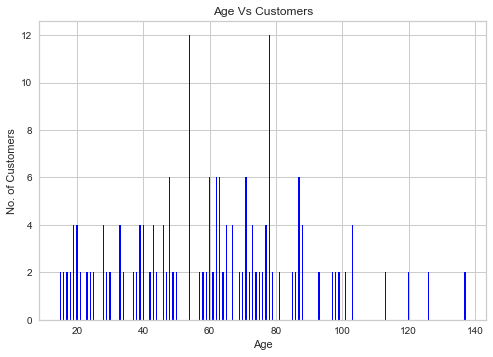

In [42]:
plt.bar(dict(data['Annual Income (k$)'].value_counts()).keys(),
        dict(data['Annual Income (k$)'].value_counts()).values(), color ='blue',
        width = 0.4)
 
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.title("Age Vs Customers")
plt.show()

In [43]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y=data['Age'].value_counts(bins=bins, sort=False) 

In [44]:
y

(-0.001, 10.0]     0
(10.0, 20.0]      17
(20.0, 30.0]      45
(30.0, 40.0]      60
(40.0, 50.0]      38
(50.0, 60.0]      23
(60.0, 70.0]      17
(70.0, 80.0]       0
(80.0, 90.0]       0
(90.0, 100.0]      0
Name: Age, dtype: int64

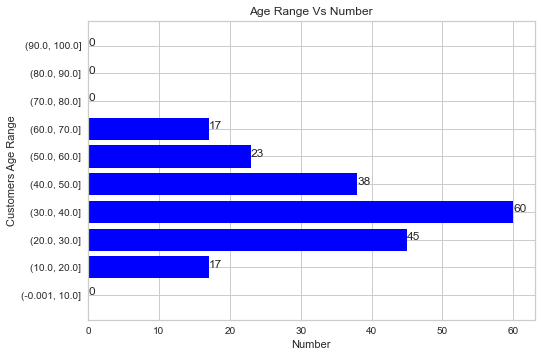

In [45]:
plt.barh(y.keys().astype('string'),dict(y).values(), color ='blue')
 
plt.xlabel("Number")
plt.ylabel("Customers Age Range")
plt.title("Age Range Vs Number")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

In [46]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x=data['Annual Income (k$)'].value_counts(bins=bins, sort=False) 

In [47]:
x

(-0.001, 10.0]     0
(10.0, 20.0]      16
(20.0, 30.0]      16
(30.0, 40.0]      18
(40.0, 50.0]      24
(50.0, 60.0]      24
(60.0, 70.0]      28
(70.0, 80.0]      36
(80.0, 90.0]      16
(90.0, 100.0]      8
Name: Annual Income (k$), dtype: int64

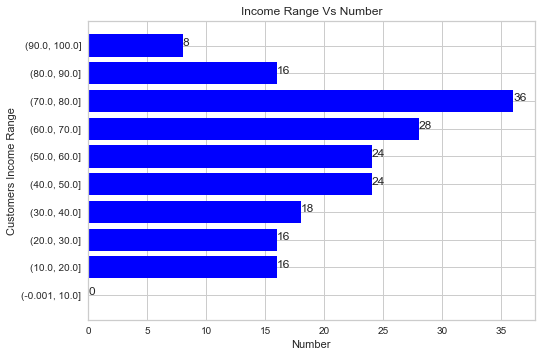

In [48]:
plt.barh(x.keys().astype('string'),dict(x).values(), color ='blue')
 
plt.xlabel("Number")
plt.ylabel("Customers Income Range")
plt.title("Income Range Vs Number")
for index, value in enumerate(x):
    plt.text(value, index, str(value))
plt.show()

In [49]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
z=data['Spending Score (1-100)'].value_counts(bins=bins, sort=False) 

In [50]:
z

(-0.001, 10.0]    16
(10.0, 20.0]      20
(20.0, 30.0]      10
(30.0, 40.0]      17
(40.0, 50.0]      40
(50.0, 60.0]      35
(60.0, 70.0]       8
(70.0, 80.0]      24
(80.0, 90.0]      16
(90.0, 100.0]     14
Name: Spending Score (1-100), dtype: int64

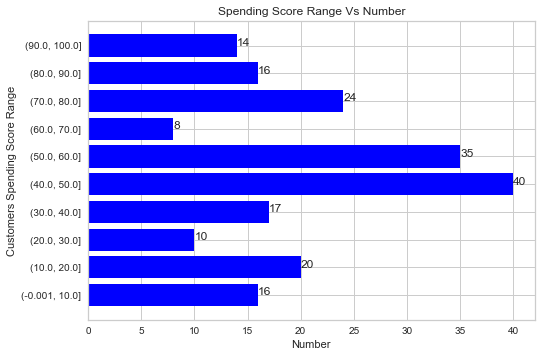

In [51]:
plt.barh(z.keys().astype('string'),dict(z).values(), color ='blue') 
plt.xlabel("Number")
plt.ylabel("Customers Spending Score Range")
plt.title("Spending Score Range Vs Number")
for index, value in enumerate(z):
    plt.text(value, index, str(value))
plt.show()

# Segments
People of all ages are contibuting to the mall 
The most important segments are 
1. Annual income
2. Spending score 
3. Age 

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [53]:
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data=data.drop(['CustomerID','Gender'],axis=1)

In [54]:
from sklearn.cluster import AgglomerativeClustering,linkage_tree

In [55]:
agc=AgglomerativeClustering().fit(data)
litree=linkage_tree(data)

In [56]:
from scipy.cluster.hierarchy import dendrogram

C:\Users\VIKAS REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


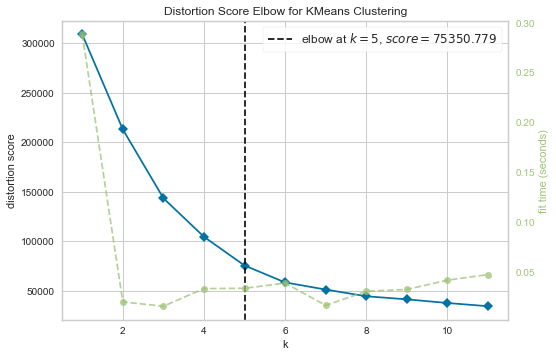

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmc = KMeans()
visualizer = KElbowVisualizer(kmc, k=(1,12)).fit(data)
visualizer.show()

The best number of possible clusters is 5 from yellowbrick

In [58]:
kmc = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(data)
data['cluster_num']=kmc.labels_

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

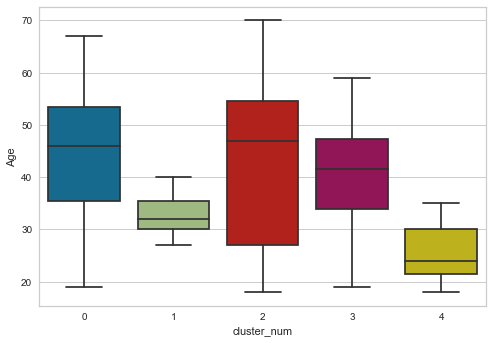

In [59]:
sns.boxplot(x="cluster_num", y="Age", data=data)

<AxesSubplot:xlabel='cluster_num', ylabel='Annual Income (k$)'>

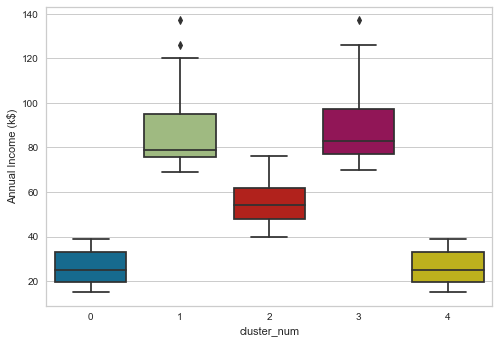

In [60]:
sns.boxplot(x="cluster_num", y="Annual Income (k$)", data=data)

<AxesSubplot:xlabel='cluster_num', ylabel='Spending Score (1-100)'>

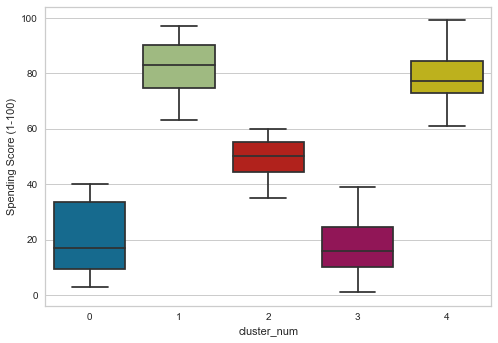

In [61]:
sns.boxplot(x="cluster_num", y="Spending Score (1-100)", data=data)

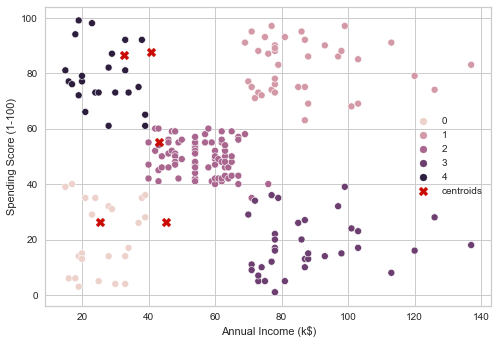

In [62]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue=kmc.labels_)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show()

 A total of 5 clusters is formed  which includes 
 1. cluster 0 is of people with HIGH annual income and HIGH spending score
 2. cluster 4 is of people with LOW annual income but with HIGH spending score
 3. cluster 2 is of people with MEDIUM annual income and MEDIUM spending score

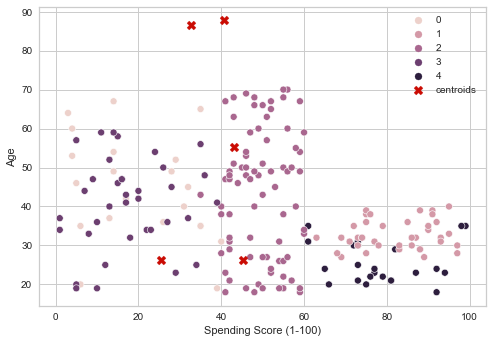

In [63]:
sns.scatterplot(data=data, x="Spending Score (1-100)", y="Age", hue=kmc.labels_)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show()

    1.People of cluster 2 has spending score of 40-60 (MEDIUM range )

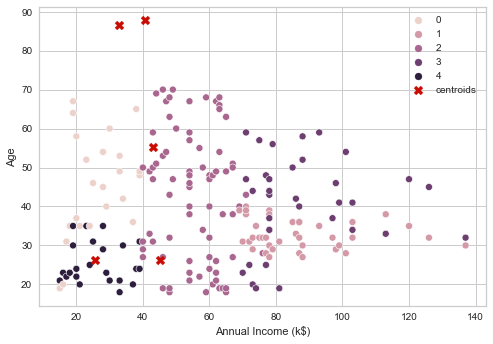

In [64]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Age", hue=kmc.labels_)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show()

Outcomes:
1. cluster 1 is a people with HIGH Income and HIGH spending score is of age range 25-40 mostly 
2. cluster 2 is a people with MEDIUM Income and MEDIUM spending score comes to all ages
3. cluster 4 is a people with LOW Income and HIGH spending score is of age range 20-40 mostly